# Preliminaries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels import datasets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import adfuller

In [20]:
df = pd.read_csv('C:\\Users\\berna\\Documents\\Eskwelabs\\Capstone Project\\consolidated_csv_03TIWI_A.csv')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
0,06/26/2021,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,RTD,CLUZ,SLUZON,03TIWI_A,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,APRI,-10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

## Dropping of columns

In [21]:
# Define the columns containing price-quantity pairs and timestamps
price_columns = [f'PRICE{i}' for i in range(1, 12)]
quantity_columns = [f'QUANTITY{i}' for i in range(1, 12)]

# Corrected line with tuple comprehension
selected_columns = ['RUN_TIME'] + [price for price in price_columns] + [quantity for quantity in quantity_columns]

In [22]:
# Apply the selection to the filtered DataFrame
result_df = df[selected_columns]
result_df.head()

,RUN_TIME,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
0,06/26/2021,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-1030.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Change Uppercase to lowercase
result_df.columns = result_df.columns.str.lower()

## Filling NaNs

In [24]:
# Forward fill from the first non-null value in each row for the price columns
result_df.loc[:, 'price1':'price11'] = result_df.loc[:, 'price1':'price11'].apply(lambda row: row.ffill(), axis=1)

# Forward fill from the first non-null value in each row for the quantity columns
result_df.loc[:, 'quantity1':'quantity11'] = result_df.loc[:, 'quantity1':'quantity11'].apply(lambda row: row.ffill(), axis=1)

result_df.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0


## Filter to 2023 Data

In [8]:
result_df['run_time'] = pd.to_datetime(result_df['run_time'], format="%m/%d/%Y %H:%M:%S %p", errors = 'coerce')

C:\Users\berna\AppData\Local\Temp\ipykernel_17996\1835035194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['run_time'] = pd.to_datetime(result_df['run_time'], format="%m/%d/%Y %H:%M:%S %p", errors = 'coerce')


In [9]:
result_df.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,NaT,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1,2021-06-26 12:05:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,2021-06-26 12:10:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,2021-06-26 12:15:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
4,2021-06-26 12:20:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0


In [52]:
# result_df[result_df['run_time'].isnull()]

# # Get the indices of rows with null values
# null_indices = result_df[result_df['run_time'].isnull()].index

# # Create a list of indices including the rows above and below null values
# neighbor_indices = list(set(null_indices) | set(null_indices - 1) | set(null_indices + 1))
# neighbor_indices = [index for index in neighbor_indices if 0 <= index < len(df)]

# # Use these indices to select the desired rows from the DataFrame
# checking_df = result_df.loc[neighbor_indices]
# checking_df.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,NaT,-10000.0,-10000.0,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
1,2021-06-26 12:05:00,-10000.0,-10000.0,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
8199,2021-08-23 11:55:00,-10000.0,-10000.0,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,...,420.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
8200,NaT,-10000.0,-10000.0,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,...,420.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
8201,2021-08-24 12:05:00,-10000.0,-10000.0,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,28000.08,...,420.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0


In [10]:
# Forward-fill missing values with the next cell's date (excluding time)
result_df['run_time'] = result_df['run_time'].fillna(result_df['run_time'].shift(-1))
result_df.head()

C:\Users\berna\AppData\Local\Temp\ipykernel_17996\31808556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['run_time'] = result_df['run_time'].fillna(result_df['run_time'].shift(-1))


,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,2021-06-26 12:05:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
1,2021-06-26 12:05:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,2021-06-26 12:10:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
3,2021-06-26 12:15:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
4,2021-06-26 12:20:00,-10000.0,-10000.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,-1030.0,...,14.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0


In [11]:
df_2022 = result_df[result_df['run_time'].dt.year == 2022]
df_2022.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
53195,2022-01-01 12:05:00,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53196,2022-01-01 12:05:00,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53197,2022-01-01 12:10:00,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53198,2022-01-01 12:15:00,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
53199,2022-01-01 12:20:00,-10000.0,-10000.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,-2030.0,...,5.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0


## Normalize Quantity Values

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Extract only the quantity columns for normalization
quantity_columns = [f'quantity{i}' for i in range(1, 12)]

# Flatten the DataFrame and extract only quantity columns
flattened_quantities = df_2022[quantity_columns].values.flatten()

# Reshape the flattened quantities to a column vector
flattened_quantities = flattened_quantities.reshape(-1, 1)

# Use MinMaxScaler on the flattened quantities
scaler = MinMaxScaler()
scaled_quantities = scaler.fit_transform(flattened_quantities)

# Reshape the scaled quantities to match the original DataFrame shape
scaled_quantities = scaled_quantities.reshape(df_2022[quantity_columns].shape)

# Update the DataFrame with the scaled values
df_2022.loc[:, quantity_columns] = scaled_quantities

## Getting the max capacity per bidding interval

In [15]:
final_df = df_2022[['run_time', 'quantity11']]
final_df.head()

,run_time,quantity11
53195,2022-01-01 12:05:00,0.53125
53196,2022-01-01 12:05:00,0.53125
53197,2022-01-01 12:10:00,0.53125
53198,2022-01-01 12:15:00,0.53125
53199,2022-01-01 12:20:00,0.53125


## Final dataset

In [16]:
final_df = final_df.rename(columns={'quantity11':'max_quantity'})
# final_df.index = pd.MultiIndex.from_arrays([final_df.index.date, final_df.index.time], names=['date', 'time'])
final_df.set_index('run_time', inplace=True)
final_df.head()

,max_quantity
run_time,
2022-01-01 12:05:00,0.53125
2022-01-01 12:05:00,0.53125
2022-01-01 12:10:00,0.53125
2022-01-01 12:15:00,0.53125
2022-01-01 12:20:00,0.53125


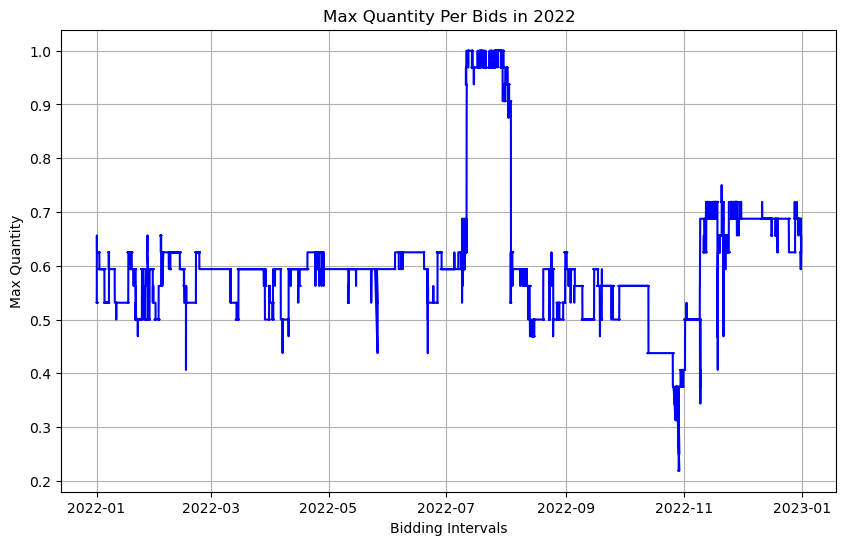

In [18]:
# Plot the time series as a line plot
plt.figure(figsize=(10, 6))
plt.plot(final_df['max_quantity'], linestyle='-', color='b', label='Max Quantity')
plt.title('Max Quantity Per Bids in 2022')
plt.xlabel('Bidding Intervals')
plt.ylabel('Max Quantity')
plt.grid(True)
plt.show()

## Trying JC's suggestions

### Weekly aggregation

In [17]:
# Resample by week and calculate mean for 'max_quantity'
final_df_weekly = final_df['max_quantity'].resample('W-Mon').mean()
final_df_weekly.head()

run_time
2022-01-03    0.590242
2022-01-10    0.573165
2022-01-17    0.538334
2022-01-24    0.555203
2022-01-31    0.555695
Freq: W-MON, Name: max_quantity, dtype: float64

### Forecast windows

In [ ]:
# Resampling the last month of 2022

# Trends and Seasonality

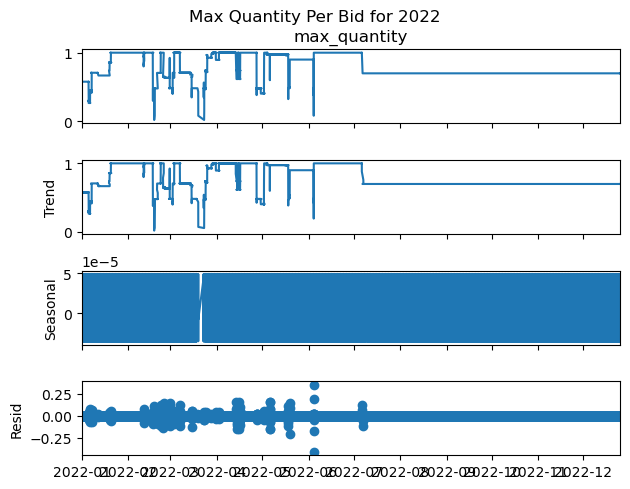

In [129]:
# Set the frequency to 5 minutes
frequency = 5

# Perform seasonal decomposition
res = sm.tsa.seasonal_decompose(final_df['max_quantity'], period=frequency)
resplot = res.plot()
plt.suptitle("Max Quantity Per Bid for 2022", y=1.01)

plt.show()